# Import files

In [2]:
import gensim
from gensim.models import Word2Vec
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import glob

# Read all files and create training corpus

In [3]:
files = glob.glob('../pre-processing/combined/*.txt')
list_of_tokens=[]
for file_name in files:
    file = open(file_name,'r')
    txt = file.read()
    list_of_tokens = list_of_tokens + txt.split('\n')

corpus = [element.split(" ") for element in list_of_tokens]

training_corpus = []
for line in corpus:
    training_corpus.append([elem for elem in line if elem != ''])

# Train the word2vec model on the corpus

In [4]:
model = Word2Vec(training_corpus, size=50, window=3, min_count=1, workers=8, sg=1)
model.train(training_corpus, total_examples=len(training_corpus), epochs=10)

(4218881, 4258030)

In [ ]:
from gensim import similarities
index = similarities.MatrixSimilarity(gensim.matutils.Dense2Corpus(model.wv.syn0.T))
similarity_matrix = []
for sims in index:
    similarity_matrix.append(sims)
similarity_array = np.array(similarity_matrix)

/Users/aashnakanuga/anaconda2/envs/env/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  


In [ ]:
similarity_array.shape

# Find mean similarity of  every sentence in test to source

In [ ]:
source_file = open('../pre-processing/combined/combined-source.txt')
test_file = open('../pre-processing/combined/combined-target.txt')

source_txt = source_file.read()
test_txt = test_file.read()

In [ ]:
test = []
max_similarity=[]
for test_elem in test_txt.split("\n"):
    for w in test_elem.split(" "):
        if w!='':
            test.append(w)
    similarities=[]
    source=[]
    for source_elem in source_txt.split("\n"):
        for w in source_elem.split(" "):
            if w!='':
                source.append(w)
        similarities.append(model.wv.n_similarity(source,test))
    max_similarity.append(max(similarities))
    test = []

In [ ]:
max_similarity

In [ ]:
mean_similarity = sum(max_similarity)/float(len(max_similarity))





# Tests on model

## Find a list of similar words for a given word

In [62]:
w1 = "love"
model.wv.most_similar(positive=w1)

[('affair', 0.7747365236282349),
 ('courtship', 0.7191614508628845),
 ('jealous', 0.7093785405158997),
 ('vow', 0.6994887590408325),
 ('illicit', 0.6967019438743591),
 ('rejection', 0.6899811029434204),
 ('u-', 0.6879823207855225),
 ('parent', 0.684080958366394),
 ('affection', 0.6839406490325928),
 ('imago', 0.6832321882247925)]

## Man is to woman, as king is to?

In [63]:
model.wv.most_similar(positive=['man', 'king'], negative=['woman'], topn=1)

[('philip', 0.6605688333511353)]

## Find a word in a list that does not belong to the same category as the other words

In [74]:
model.wv.doesnt_match("treachery obstacle kinsman hate".split())

'hate'

## Check the accuracy using a common file used to test the model

In [69]:
accuracy=model.wv.accuracy("questions-words.txt")

In [70]:
accuracy_ratio = []
category_names = []
for category in accuracy:
    if len(category['correct'])+len(category['incorrect'])>0:
        correctness = len(category['correct'])/(len(category['correct'])+len(category['incorrect']))
    else:
        correctness = 0.0
    accuracy_ratio.append(correctness)
    category_names.append(category['section'])

In [71]:
for i in range(0,len(category_names)):
    print(category_names[i], accuracy_ratio[i])

capital-common-countries 0.0
capital-world 0.0
currency 0.0
city-in-state 0.004761904761904762
family 0.07142857142857142
gram1-adjective-to-adverb 0.0
gram2-opposite 0.0
gram3-comparative 0.005040322580645161
gram4-superlative 0.007246376811594203
gram5-present-participle 0.007122507122507123
gram6-nationality-adjective 0.0
gram7-past-tense 0.030952380952380953
gram8-plural 0.0
gram9-plural-verbs 0.0
total 0.012625324916450055


## Find cosine distance between two words

In [72]:
dist = model.wv.distance("queen","king")

In [73]:
print(dist)

0.24179071994870938


# Visualize

In [15]:
vocab = list(model.wv.vocab)
X = model[vocab]

/Users/aashnakanuga/anaconda2/envs/env/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [44]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X[:200,:])

In [47]:
df = pd.DataFrame(X_tsne, index=vocab[:200], columns=['x', 'y'])

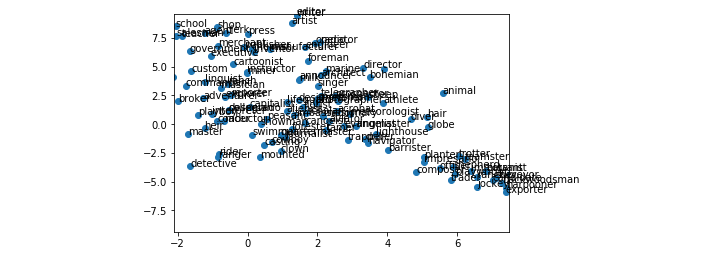

In [49]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])
ax.margins(-0.25,0)
for word, pos in df.iterrows():
    ax.annotate(word, pos)